<a href="https://colab.research.google.com/github/PratikHazarika/AI-ML-Projects/blob/main/ML%20Algorithms/Ad%20Click%20Prediction/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive/


# Loading the dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Ad Prediction/advertising.csv')

# Filtering the dataset

In [ ]:
df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 'columns', inplace=True)
df.rename({'Daily Time Spent on Site':'Time Spent', 'Area Income':'Income', 'Daily Internet Usage':'Internet Usage', 'Clicked on Ad':'Clicked', 'Male': 'Gender'}, axis='columns', inplace=True)

In [ ]:
df

,Time Spent,Age,Income,Internet Usage,Gender,Clicked
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


# Data Visualization

## Time Spent vs Clicked

Text(0, 0.5, 'Clicked')

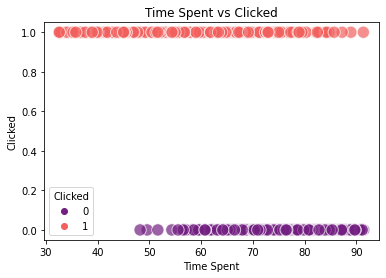

In [ ]:
sb.scatterplot('Time Spent', 'Clicked', data = df, hue = 'Clicked', palette = 'magma', s = 150, alpha = 0.7)

plt.title('Time Spent vs Clicked')
plt.xlabel('Time Spent')
plt.ylabel('Clicked')

# Age vs Clicked

Text(0, 0.5, 'Clicked')

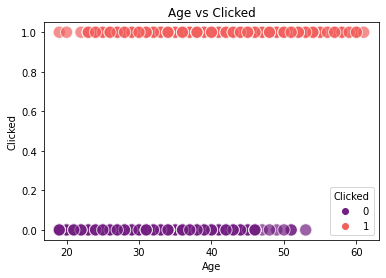

In [ ]:
sb.scatterplot('Age', 'Clicked', data = df, hue = 'Clicked', palette = 'magma', s = 150, alpha = 0.7)

plt.title('Age vs Clicked')
plt.xlabel('Age')
plt.ylabel('Clicked')

# Income vs Clicked

Text(0, 0.5, 'Clicked')

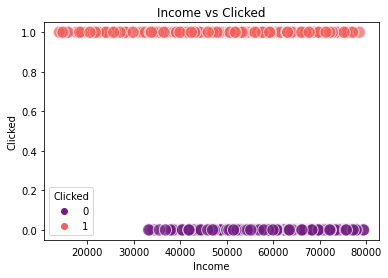

In [ ]:
sb.scatterplot('Income', 'Clicked', data = df, hue = 'Clicked', palette = 'magma', s = 150, alpha = 0.7)

plt.title('Income vs Clicked')
plt.xlabel('Income')
plt.ylabel('Clicked')

# Internet Usage vs Clicked

Text(0, 0.5, 'Clicked')

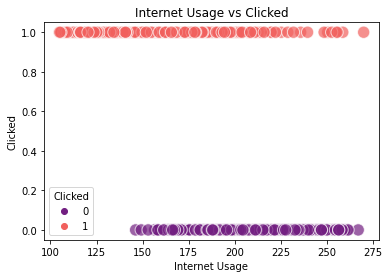

In [ ]:
sb.scatterplot('Internet Usage', 'Clicked', data = df, hue = 'Clicked', palette = 'magma', s = 150, alpha = 0.7)

plt.title('Internet Usage vs Clicked')
plt.xlabel('Internet Usage')
plt.ylabel('Clicked')

# Splitting the dataset

In [ ]:
X = df[['Time Spent', 'Age', 'Income','Internet Usage', 'Gender']]
y = df['Clicked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# Training

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Accuracy

In [ ]:
accuracy = knn_model.score(X_test, y_test)
print(f'The accuracy of the model: {accuracy * 100}')

The accuracy of the model: 69.0


# Confusion Matrix

In [ ]:
predictions = knn_model.predict(X_test)

actual = y_test
predicted = predictions

matrix = confusion_matrix(actual, predicted, labels = [1,0])
print(f'Confusion matrix : \n {matrix} \n\n')

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print(f'True positive: {tp} \t True Negative: {tn}')
print(f'False positive: {fp} \t False Negative: {fn} \n\n')

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[73 39]
 [23 65]] 


True positive: 73 	 True Negative: 65
False positive: 23 	 False Negative: 39 


Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.65      0.70       112
           0       0.62      0.74      0.68        88

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

